## Create a categorical plot to summarize the clusters found in all the runs queried in DAVID

Made by: Cynthia Soto<br>
Date: xxxxxx 2022<br>
Last md: April 25th, 2022<br>

**Assumptions:**<br>
It is needed to provide a metadata file with the cluster numbers & names
**Input:** metadata_cluster_comparision_by_categories_py.csv<br>
*This file was cured at hand based on the DAVID clustering rpt (ref. file: suplementario\data_DAVIDClustering_summary.xls)*

**Code goal:** <br>
1. Build a *Categorical plot* representing the clusters specify in the metadata file.

In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 

In [2]:
# Set the base directory
try:
    # Change the current working Directory      
    os.chdir("/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/MG_DarkMagenta_WGCNA_DAVID_VisANT")
    print("Directory changed:", os.getcwd() )
except OSError:
    print("Can't change the Current Working Directory")        
#print(os.listdir(os.getcwd())  

Directory changed: /home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/MG_DarkMagenta_WGCNA_DAVID_VisANT


In [3]:
# clusters_file = os.path.basename(file)
# clusters_file = 'metadata_cluster_comparision_by_categories_py.csv'
# have alternative labels for leyend in the plot
clusters_file = 'metadata_cluster_comparision_by_categories_py_v2.csv'
clusters_file

'metadata_cluster_comparision_by_categories_py_v2.csv'

In [4]:
# Remember to add a header line by hand in the input file to capture the column names  
df_clusters = pd.read_csv(clusters_file, header=0, index_col=0, sep=',')  #(clusters_file, header=1, index_col=0, sep='\t')
df_clusters.reset_index(inplace=True)

In [5]:
df_clusters.head(15)

,RUN_ID,ORIGINAL_CLUSTER_NAME,Cluster_Type,Cluster_Desc,Cluster_Number,Number_Of_Genes,Unique_Genes,Enrichment_Score
0,RUN0,Clust_12,1,C1. Cell wall / extracellular region,C1. Cell wall / ER,28,14,0.42835
1,RUN1,Clust_8,1,C1. Cell wall / extracellular region,C1. Cell wall / ER,28,14,0.42835
2,RUN3,Clust_6,1,C1. Cell wall / extracellular region,C1. Cell wall / ER,22,12,0.09393
3,RUN3,Clust_2,2,C2. Cell wall biogenesis,C2. Cell wall B,17,6,1.11324
4,RUN3,Clust_3,3,C3. Developmental protein,C3. Dev. protein,17,8,0.62078
5,RUN0,Clust_9,3,C3. Developmental protein,C3. Dev. protein,23,8,0.59716
6,RUN1,Clust_6,3,C3. Developmental protein,C3. Dev. protein,23,8,0.59716
7,RUN3,Clust_1,4,C4. Glycosyltransferase,C4. Glycosyltrans,29,12,1.42021
8,RUN0,Clust_3,4,C4. Glycosyltransferase,C4. Glycosyltrans,34,12,1.34897
9,RUN1,Clust_2,4,C4. Glycosyltransferase,C4. Glycosyltrans,34,12,1.34897


In [6]:
#sns.catplot(x="RUN_ID", y="Unique_Genes", hue="Cluster_Desc", jitter=False, data=df_clusters)

In [7]:
sns.catplot

<function seaborn.categorical.catplot(*, x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x7fbbf808f9d0>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)>

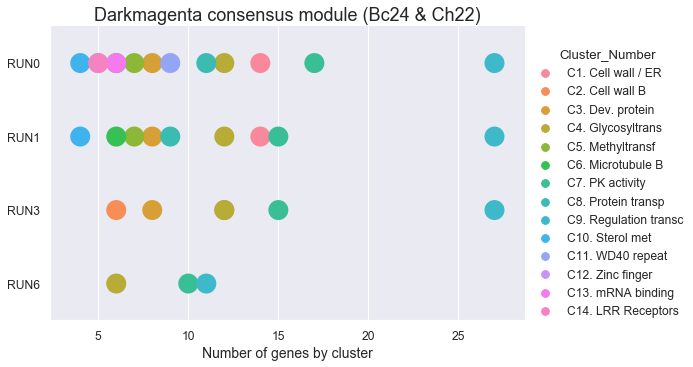

<Figure size 1800x1200 with 0 Axes>

In [20]:
# plot figure
#sns.set_theme()
#plt.figure(figsize=(25, 4))

from PIL import Image

# #sns.set_theme(style="ticks")  #whitegrid
# #sns.set_context('notebook')   #paper, notebook, talk, poster
sns.set_theme(style='whitegrid', palette='pastel')   
sns.set(font_scale = 1.1)

# jitter: The jitter parameter controls the magnitude of jitter or disables it altogether
# s: marker size 
# aspect:  aspect * height gives the width
# change x="RUN_ID", y="Unique_Genes" to plot in vertical way
ax = sns.catplot(x="Unique_Genes", y="RUN_ID", hue="Cluster_Number", jitter=False, 
                data=df_clusters,s=20, 
                height=5, aspect=1.6)   
ax.set_xlabels('Number of genes by cluster', fontsize=14) # not set_label
#ax.set_ylabels("DAVID's Clusterization RUNS", fontsize= 14)
ax.set_ylabels("")
plt.title('Darkmagenta consensus module (Bc24 & Ch22)',  fontsize= 18)
plt.figure(dpi=300)
plt.show()

In [9]:
sns.catplot

<function seaborn.categorical.catplot(*, x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x7fbbf808f9d0>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)>

In [15]:
plt.savefig('bubble_plot.pdf')

<Figure size 432x288 with 0 Axes>

In [16]:
# sns.plotting_context()
# sns.plotting_context("notebook")

In [17]:
# preparing labels to print and selected clusters
list_of_column_number = list(df_clusters['Cluster_Number'])
plot_labels = list( dict.fromkeys(list_of_column_number) )
plot_labels = plot_labels[:-4]
plot_labels

['C1. Cell wall / ER',
 'C2. Cell wall B',
 'C3. Dev. protein',
 'C4. Glycosyltrans',
 'C5. Methyltransf',
 'C6. Microtubule B',
 'C7. PK activity',
 'C8. Protein transp',
 'C9. Regulation transc',
 'C10. Sterol met']

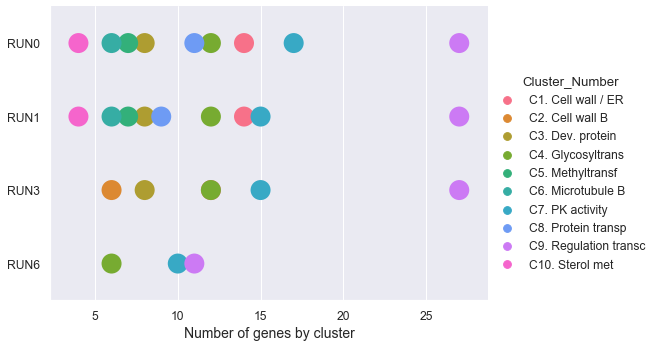

<Figure size 1800x1200 with 0 Axes>

In [18]:
#sns.set_theme(style='whitegrid', palette='husl')   

sns.set(font_scale = 1.1)

# jitter: The jitter parameter controls the magnitude of jitter or disables it altogether
# s: marker size 
# aspect:  aspect * height gives the width
# change x="RUN_ID", y="Unique_Genes" to plot in vertical way

ax = sns.catplot(x="Unique_Genes", y="RUN_ID", hue='Cluster_Number',
                jitter=False, 
                data=df_clusters,
                s=20, 
                height=5, aspect=1.5,
                hue_order = plot_labels, 
                palette='husl')

ax.set_xlabels('Number of genes by cluster', fontsize=14) # not set_label
#ax.set_ylabels("DAVID's Clusterization RUNS", fontsize= 14)
ax.set_ylabels("")
#plt.title('Darkmagenta consensus module (Bc24 & Ch22)',  fontsize= 18)

plt.figure(dpi=300)
plt.show()


In [19]:
plt.savefig("bubble_plt.png",dpi=300)

<Figure size 432x288 with 0 Axes>